In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()  #importing mnist dataset

In [33]:
len(X_train)   #length of train dataset

60000

In [34]:
len(X_test)   #length of test dataset

10000

In [35]:
X_train[0].shape   #shape of datset

(28, 28)

In [36]:
X_train[0]    #2d array 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

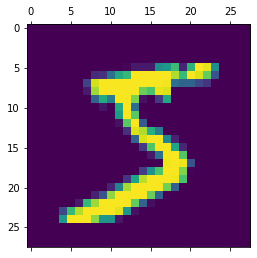

In [37]:
plt.matshow(X_train[0])

In [38]:
y_train[0]

5

In [39]:
y_train[:5]  #first 5 samples

array([5, 0, 4, 1, 9], dtype=uint8)

In [40]:
X_train.shape   #3d shape # will flatten into 1d array in below steps

(60000, 28, 28)

In [41]:
X_train =  X_train/255     #scaling data to increse accuracy
X_test = X_test/255

In [42]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [44]:
X_train_flattened 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
X_test_flattened[0]   #converted into 1d array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')  #10 is output, 784 is input neurals
])
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)   #epochs= number of iterartions

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4698 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9254


In [48]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2663 - accuracy: 0.9257


[0.266269713640213, 0.9257000088691711]

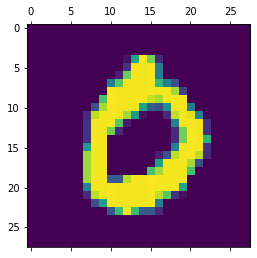

In [52]:
plt.matshow(X_test[3])

In [53]:
y_predicted = model.predict(X_test_flattened)
y_predicted[3]

array([9.99559522e-01, 3.50722580e-08, 1.00021005e-01, 1.50617063e-02,
       4.70075065e-05, 1.80050582e-01, 1.10979557e-01, 2.07539499e-02,
       4.04388905e-02, 2.06249058e-02], dtype=float32)

In [54]:
np.argmax(y_predicted[3])

0

In [55]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] 

[7, 2, 1, 0, 4]

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  920,   22,    7,    5,   12,   10,   38,    4],
       [   2,    0,   18,  928,    0,   24,    2,   10,   19,    7],
       [   1,    1,    7,    2,  911,    0,   10,    4,   10,   36],
       [   8,    2,    3,   34,    7,  788,   10,    4,   30,    6],
       [  12,    3,    8,    1,    8,   15,  906,    2,    3,    0],
       [   1,    5,   22,    7,    8,    0,    0,  945,    4,   36],
       [   6,    7,    7,   22,    9,   29,    8,   10,  869,    7],
       [  10,    7,    1,   13,   27,    6,    0,   19,   11,  915]])>

Text(69.0, 0.5, 'Truth')

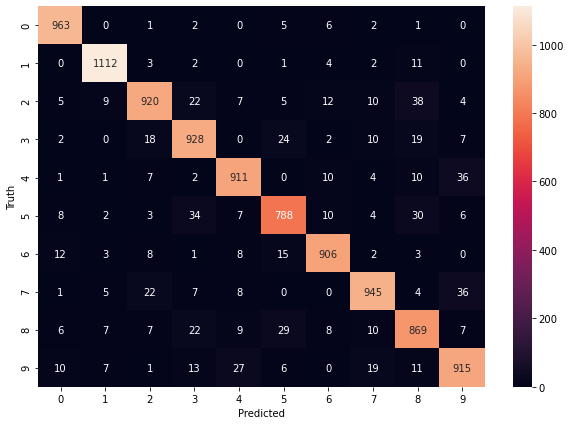

In [60]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')#adding input layers and hidden layers to it
])
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1243 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9845


In [62]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9741


[0.08370554447174072, 0.9740999937057495]

Text(69.0, 0.5, 'Truth')

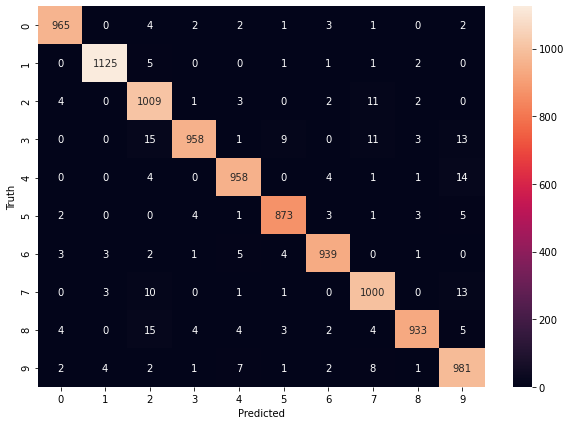

In [64]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)



import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100,activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')#adding flatten to direct by keras
])
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)
model.fit(X_train,y_train, epochs=15) 

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.9207
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9628
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9741
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9797
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9874
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9915
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9932
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020